# Данилов Д. С. ИУ5-61Б РК1 Вариант 4

## Задача

#### Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

## Дополнительное требование

#### Для студентов групп ИУ5-61Б, ИУ5Ц-81Б - для пары произвольных колонок данных построить график "Диаграмма рассеяния".

### Задание

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('../datasets/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0.0,1,168.0,0.0,1.0,2,2,3.0,0.0
1,53.0,1,0,NaN,203.0,1.0,0,155.0,1.0,3.1,0,0,3.0,0.0
2,70.0,1,0,145.0,NaN,0.0,1,125.0,1.0,2.6,0,0,3.0,0.0
3,61.0,1,0,148.0,203.0,0.0,1,161.0,0.0,0.0,2,1,3.0,0.0
4,62.0,0,0,138.0,294.0,1.0,1,NaN,0.0,1.9,1,3,2.0,0.0


Количество строк с пустыми значениями

In [4]:
data.isna().sum()

age          3
sex          0
cp           0
trestbps    17
chol        18
fbs          4
restecg      0
thalach     10
exang        2
oldpeak      0
slope        0
ca           0
thal         1
target       1
dtype: int64

Удаление строк с пустыми значениями

In [5]:
data.dropna(inplace=True, axis=0, subset=['age', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'thal', 'target'])
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Корреляция

<AxesSubplot: >

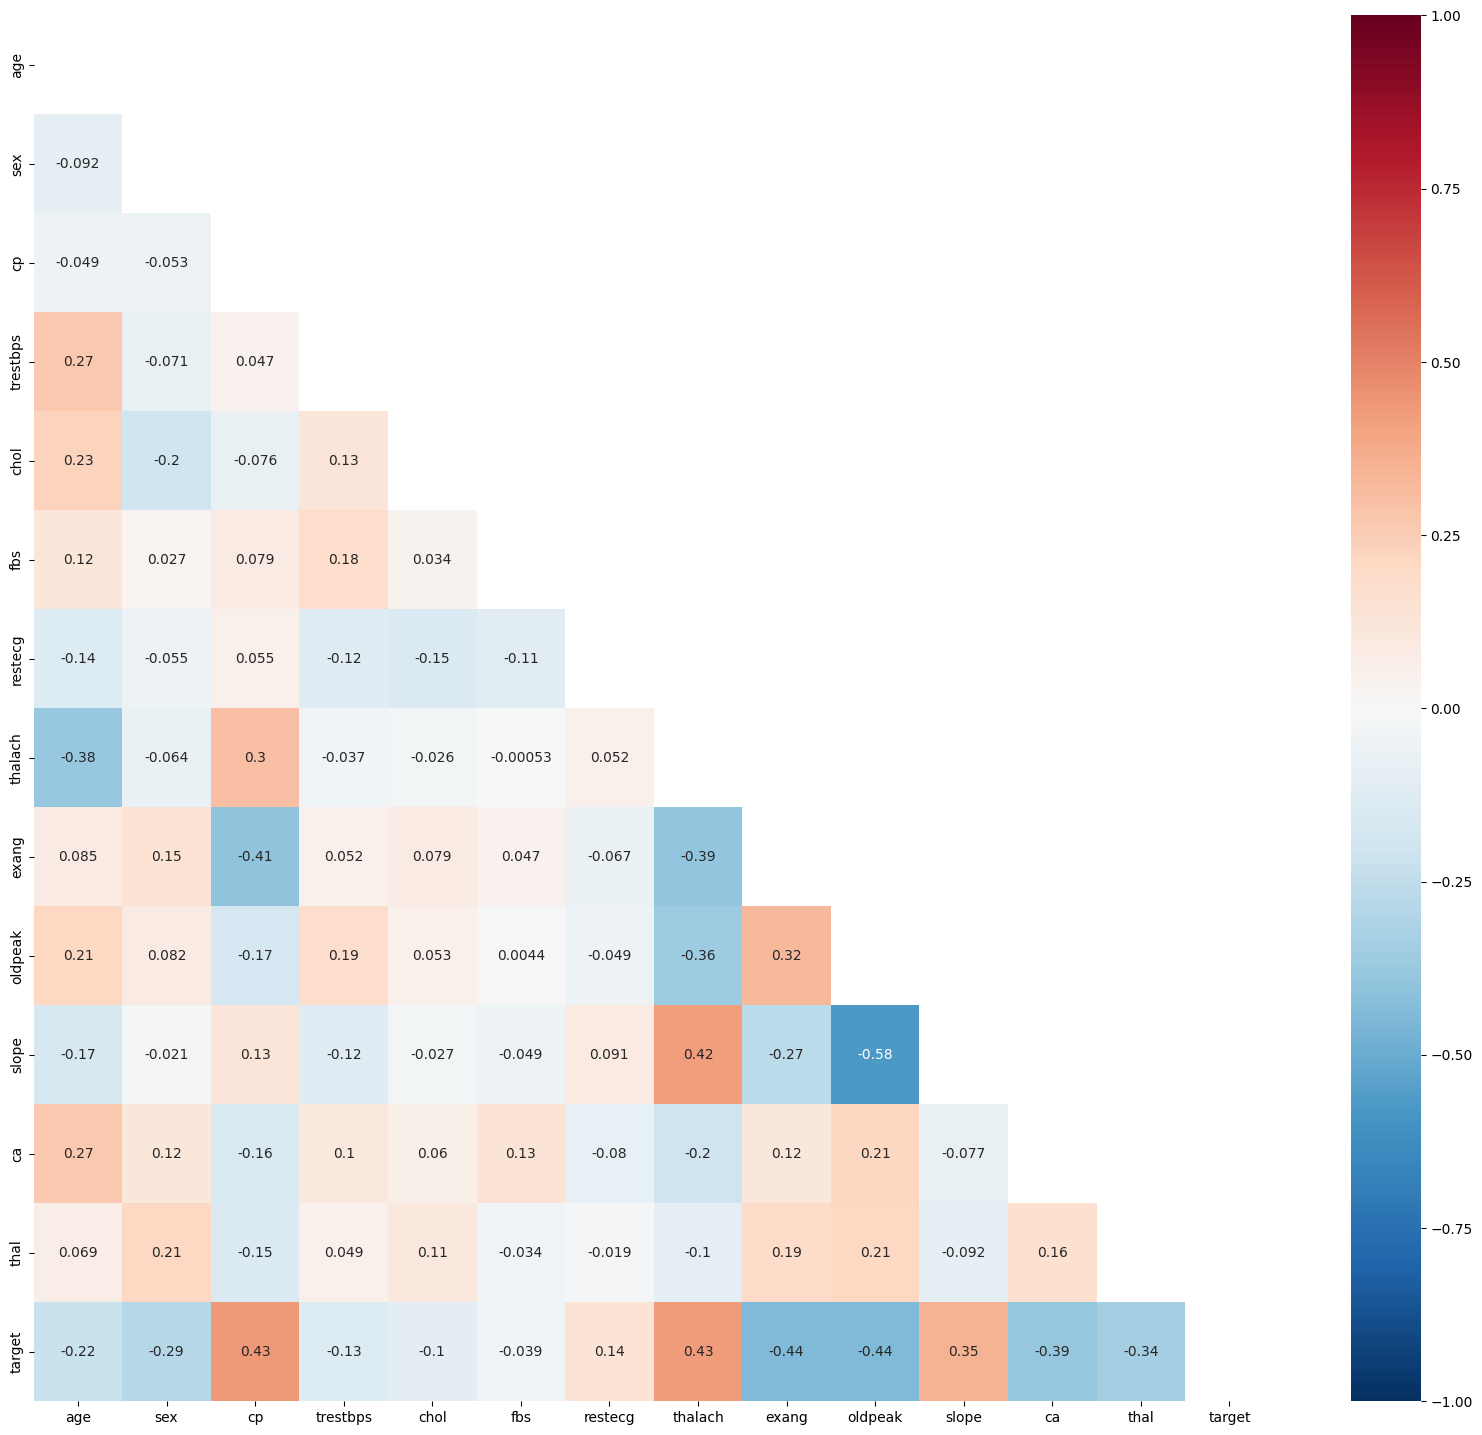

In [6]:
plt.figure(figsize=(20, 18))
mask=np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask=mask, annot=True, vmin=-1.0, vmax=1, center=0, cmap='RdBu_r')

С целевым признаком наиболее сильную корреляцию имеют признаки 'exang' (-0.44), 'oldpeak' (-0.44), 'cp' (0.43), 'thalach' (0.43). Эти признаки будут наиболее информативны при построении моделей машинного обучения. Целевой признак также коррелирует с признаками 'ca' (0.39), 'slope' (0.35), 'trial' (-0.34), 'sex' (-0.29). Эти признаки также стоит использовать при обучении модели. Признаки 'fbs' (-0.039), 'chol' (-0.1), 'trestbps' (-0.13), 'restecg' (0.14), 'age' (-0.22) слабо коррелируют с целевым признаком и могут негативно сказаться на модели машинного обучения, поэтому их стоит исключить из модели.
Однако не все признаки, которые имеют сильную корреляцию, стоит использовать для построения модели машинного обучения. Между признаками 'oldpeak' и 'slope' наблюдается очень высокая корреляция (-0.58). Поэтому из этих двух признаков стоит оставить тот, который имеет наибольшую корреляцию с целевым признаком - 'oldpeak'. Остальные нецелвые признаки не коррелируют друг с другом так сильно.
Таким образом, на основе признаков 'exang', 'oldpeak', 'cp', 'thalach', 'ca', 'trial', 'sex' могут быть построены модели машинного обучения, первые четыре признака могут иметь наиболее весомый вклад в их обучение.

### Дополнительное задание

#### Диаграмма рассеяния по возрасту и холестерину

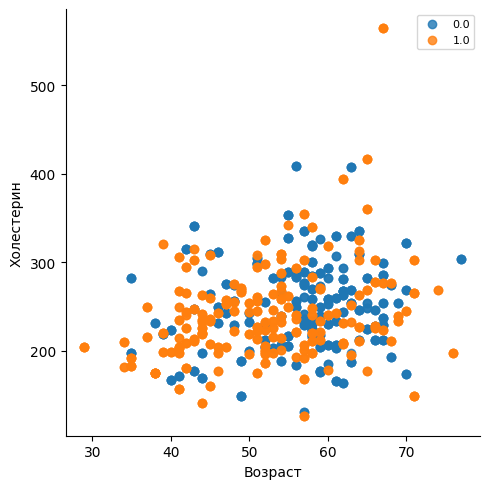

In [7]:
sns.lmplot(x='age', y='chol', data=data, fit_reg=False, hue='target', legend=False)
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('Возраст')
plt.ylabel('Холестерин')
plt.show()

#### Диаграмма рассеяния по возрасту и максимально зафиксированному пульсу

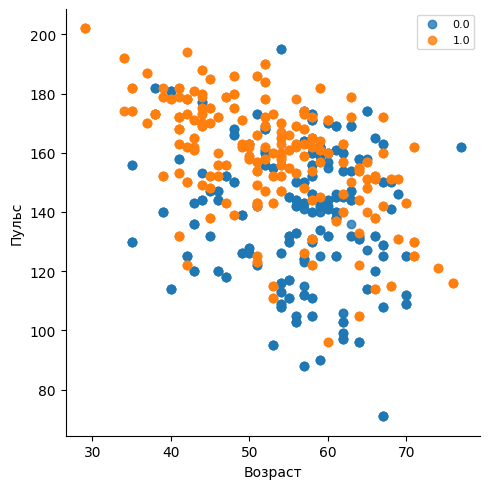

In [8]:
sns.lmplot(x='age', y='thalach', data=data, fit_reg=False, hue='target', legend=False)
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('Возраст')
plt.ylabel('Пульс')
plt.show()

#### Диаграмма рассеяния по возрасту и по артериальному давлению в покое

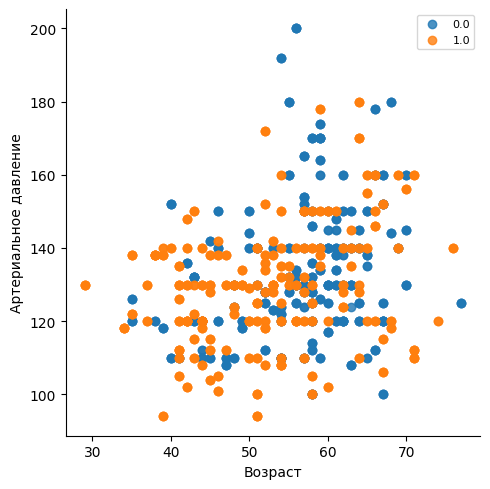

In [9]:
sns.lmplot(x='age', y='trestbps', data=data, fit_reg=False, hue='target', legend=False)
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('Возраст')
plt.ylabel('Артериальное давление')
plt.show()